# Lesson 7 Dimensionality Reduction

In this lesson, we are going to apply PCA and LDA to Iris dataset and visualize them in two dimension

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
# importing the Iris dataset with pandas
df = pd.read_csv('Iris.csv')
print(df.columns)
df.describe()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


For many algorithms, feature scaling will affect the model performance. In general scaling improves performance. Standard Scaler scale the value based on the variance in the data. 

*Important Note: we should scale the test data based on the same scale that we use on the train data. So we use fit_transform on training data, but we normally use transform() on the test data*

In [3]:
from sklearn.preprocessing import StandardScaler
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Species']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pd.DataFrame(data=x, columns = features).head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## Performing 2D Principal Component Analysis

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [5]:
finalDf = pd.concat([principalDf, df[['Species']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


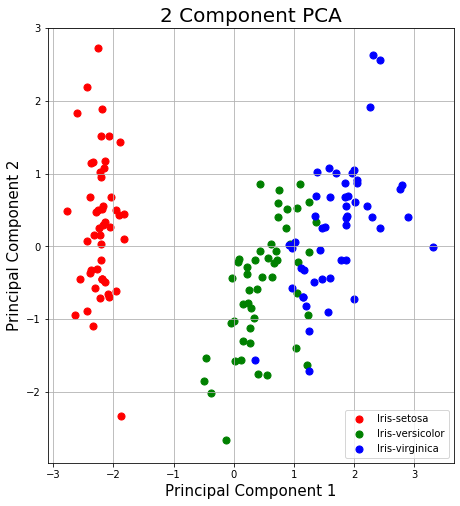

In [6]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1) 
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = 'rgb'
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax1.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax1.legend(targets)
ax1.grid()

## Explained Variance

The explained variance tells us how much information (variance) can be attributed to each of the principal components. 

Together, the first two principal components contain 97.76% of the information. The first principal component contains 92.46% of the variance and the second principal component contains 5.3% of the variance. The third and fourth principal component contained the rest of the variance of the dataset.

In [7]:
print(pca.explained_variance_ratio_)

print(pca.explained_variance_ratio_.sum())

[0.72770452 0.23030523]
0.9580097536148199


## Performing 2D Linear Discriminant Analysis

In [8]:
# What is ravel - convert 2D array with 1 column into 1D array.
print(y.shape)
print(np.ravel(y).shape)

print(x.shape)

(150, 1)
(150,)
(150, 4)


In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)  
lda_result = lda.fit_transform(x, np.ravel(y))  

ldaDf = pd.DataFrame(data = lda_result
             , columns = ['Linear Discriminant 1', 'Linear Discriminant 2'])


In [10]:
finalLdaDf = pd.concat([ldaDf, df[['Species']]], axis = 1)
finalLdaDf.head(5)

,Linear Discriminant 1,Linear Discriminant 2,Species
0,-8.084953,0.328454,Iris-setosa
1,-7.147163,-0.755473,Iris-setosa
2,-7.511378,-0.238078,Iris-setosa
3,-6.837676,-0.642885,Iris-setosa
4,-8.157814,0.540639,Iris-setosa


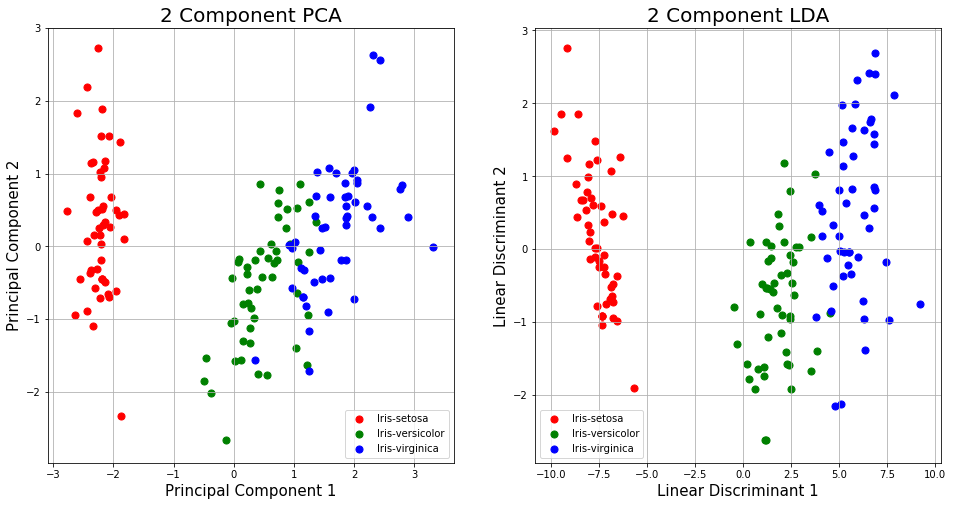

In [11]:
fig = plt.figure(figsize = (16,8))
ax2 = fig.add_subplot(1,2,2) 
ax2.set_xlabel('Linear Discriminant 1', fontsize = 15)
ax2.set_ylabel('Linear Discriminant 2', fontsize = 15)
ax2.set_title('2 Component LDA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = 'rgb'
for target, color in zip(targets,colors):
    indicesToKeep = finalLdaDf['Species'] == target
    ax2.scatter(finalLdaDf.loc[indicesToKeep, 'Linear Discriminant 1']
               , finalLdaDf.loc[indicesToKeep, 'Linear Discriminant 2']
               , c = color
               , s = 50)
ax2.legend(targets)
ax2.grid()

#Copy from the previous code
ax1 = fig.add_subplot(1,2,1) 
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = 'rgb'
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax1.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax1.legend(targets)
ax1.grid()

plt.show()

## Explained Variance

The explained variance tells us how much information (variance) can be attributed to each of the  components. 

Together, the first two linear discriminant contain 99.99% of the information. The first linear discriminant contains 99.14% of the variance and the second principal component contains 0.85% of the variance. 

In this case, we can expect a good classification result even if we reduce the features into a single linear discriminant

In [12]:
print(lda.explained_variance_ratio_)

print(lda.explained_variance_ratio_.sum())

[0.99147248 0.00852752]
0.9999999999999999


# Exercise

Rename or duplicate this notebook and perform classification based on the reduced features and compare your result without feature reduction
